In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('../img/robot_arm1.jpg')
img2 = cv2.imread('../img/robot_arm2.jpg')
img_gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff=cv2.absdiff(img_gray1,img_gray2)  # 두 영상의 차의 절대 값 반환

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_,diff = cv2.threshold(diff,1,255,cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0


#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2,diff_red)   # RED만 1 나머지 0

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#--①
#합성에 사용할 이미지를 알파채널이 있게 열기 
img_fg=cv2.imread('../img/opencv_logo.png',cv2.IMREAD_UNCHANGED)
#배경이미지 열기 
img_bg = cv2.imread('../img/girl.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_,mask = cv2.threshold(img_fg[:,:,3],1,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg,cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h,10:10+w]

#--④ 마스크 이용해서 오려내기 
masked_fg = cv2.bitwise_and(img_fg,img_fg,mask=mask)
masked_bg = cv2.bitwise_and(roi,roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg+masked_bg
img_bg[10:10+h,10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 

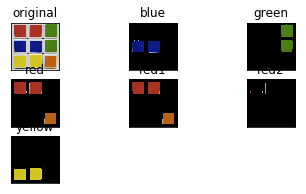

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("../img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)


#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1,res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)


#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red,'red1':res_red1,'red2':res_red2, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(4,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

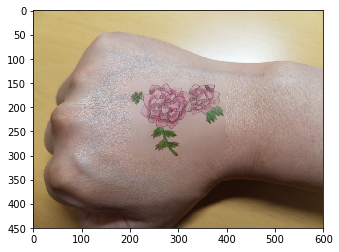

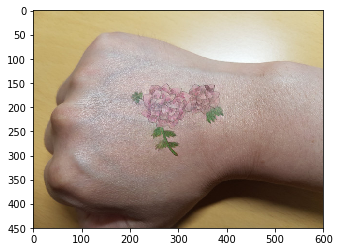

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("../img/drawing.jpg")
img2= cv2.imread("../img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)

#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE) # 원본이미지 그대로 합성
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE) # 자연스럽게 혼합되게하는 합성


#--⑤ 결과 출력
plt.imshow(cv2.cvtColor(normal, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mixed, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
import cv2
import numpy as np

rate = 15.0               # 모자이크에 사용할 축소 비율 (1/rate)
win_title = 'mosaic'    # 창 제목
img = cv2.imread('../img/taekwonv1.jpg')    # 이미지 읽기
while True:
    x,y,w,h = cv2.selectROI('img', img, False) # 관심영역 선택
    if w and h:
        print("w: ",w," h: ", h)
        # 관심영역 지정
        roi = img[y:y+h, x:x+w]
        # 1/rate 비율로 축소
        roi = cv2.resize(roi, None, fx=1.0/rate, fy = 1.0/rate, interpolation = cv2.INTER_AREA)
        # 원래 크기로 확대  
        roi = cv2.resize(roi, (w,h), fx=rate, fy = rate, interpolation = cv2.INTER_AREA)
        # 원본 이미지에 적용
        
        img[y:y+h, x:x+w]=roi
        
        cv2.imshow(win_title, img)
        
    else:
        break

cv2.destroyAllWindows()


w:  282  h:  205


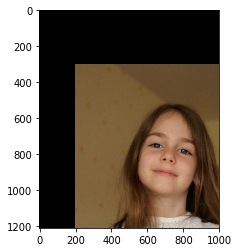

In [13]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

image = cv2.imread('../img/image.jpg')

h, w = image.shape[:2]

move = np.float32([[1,0,200],[0,1,300]])
dst = cv2.warpAffine(image, move, (w,h))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

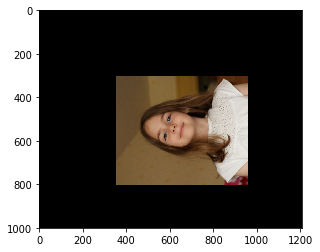

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../img/image.jpg')

# 행과 열 정보만 저정합니다. 
rows, cols = img.shape[0:2]

m90 = cv2.getRotationMatrix2D((rows/2, cols/2), 90, 0.5)
dst = cv2.warpAffine(img,m90, (rows, cols))


plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show() 

In [20]:
import cv2, time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../img/sudoku.jpg")

# 케니 엣지 적용 ******************** 
edges = cv2.Canny(img, 100,200)

# 결과 출력
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()

edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(edges)
plt.show()

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'
